### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 3
### Due: Monday, Feb 14th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on Feb 14th.

---

## Problem 1

Consider a family with two children. Assume that the probability of females and males being born is equal, i.e. $p(F)=0.5$ and $p(M)=0.5$. Remember that "given" means your calculation is conditioned on some already fixed data or outcome. 

1) What is the probability of one male and one female **GIVEN** that the first child is male. 

2) What is the probability of two females **GIVEN** that at least one child is female.

3) What is the probability of two females **GIVEN** that the older child is female.

You will find it easiest to answer these questions by sketching a "tree diagram" to visualize the options for the oldest child, and the branching options for the youngest child. 

Either write your solution as Markdown/Latex below, or paste in a scanned image of your handwritten solution.

### Solution

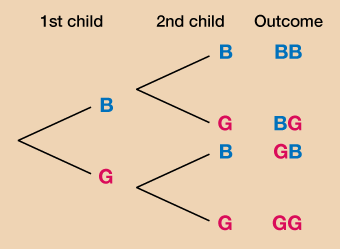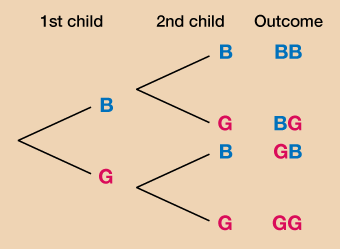


Source: The Open Learn University. (n.d.). Probability. Everyday maths 2 (Wales). Retrieved February 12, 2022, from https://www.open.edu/openlearn/mod/oucontent/view.php?id=90853&section=7

$P(A|B) = \frac{P(A \cap B)}{P(B)}$

1.) $P(BG|\textrm{ child 1} = B) = \frac{P(BG \cap \textrm{ child 1} = B)}{P(child 1 = B)} = \frac{1/4}{1/2} = \frac{1}{2}$

2.) $P(GG|>= 1 G) = \frac{P(GG \cap >= 1 G)}{P(>= 1 G)} = \frac{1/4}{3/4} = \frac{1}{3}$

3.) $P(GG|\textrm{ child 1} = G) = \frac{P(GG \cap \textrm{ child 1} = G)}{P(child 1 = G)} = \frac{1/4}{1/2} = \frac{1}{2}$

## Problem 2

The data in hw3_populations.txt (source: scipy-lectures.org) describes the populations of hares and lynxes (and carrots) in northern Canada during 20 years:


create a Python script to

1. plot hw3_populations.txt (using matlab)


2. calculate and output:

    a) The mean, median and std of the populations of each species for the years in the period.
    
    b) The year each species had the largest population.
    
    c) The species that has the largest population for each year. (Hint: argsort & fancy indexing of np.array(['H', 'L', 'C']))
    
    d) The years were any of the populations is above 50000. (Hint: comparisons and np.any)
    
    e) The top 2 years for each species when they had the lowest populations. (Hint: argsort, fancy indexing)
    
    f) Compare (plot) the change in hare population (see help(np.gradient)) and the number of lynxes. Check correlation (see help(np.corrcoef)).



### Solution



1. plot hw3_populations.txt (using matlab)

# year,hare,lynx,carrot
1900,30000,4000,48300
1901,47200,6100,48200
1902,70200,9800,41500
1903,77400,35200,38200
1904,36300,59400,40600
1905,20600,41700,39800
1906,18100,19000,38600
1907,21400,13000,42300
1908,22000,8300,44500
1909,25400,9100,42100


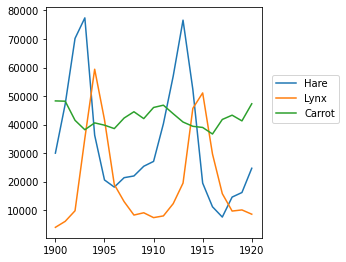

In [1]:
import numpy as np
import pandas as pd
url = 'https://raw.githubusercontent.com/scipy-lectures/scipy-lecture-notes/master/data/populations.txt'
df = pd.read_table(url)
df = df.astype('int32')
display(df.style.hide_index())
data = df.to_numpy()
year, hares, lynxes, carrots = data.T  # trick: columns to variables

import matplotlib.pyplot as plt
plt.axes([0.2, 0.1, 0.5, 0.8]) 

plt.plot(year, hares, year, lynxes, year, carrots) 

plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5)) 

2. calculate and output:

In [2]:
def bold(str):
    return "\033[1m" + str + "\033[0m" + "\n"

speciesList = ['hare','lynx','carrot']

a) The mean, median and std of the populations of each species for the years in the period.

In [3]:
a = df[speciesList].mean().astype(int)
a = a.to_frame(name = "Mean")
b = df[speciesList].median().astype(int)
b = b.to_frame(name = "Median")
c = df[speciesList].std(ddof=0).astype(int)
c = c.to_frame(name = "STD")

pd.concat([a, b, c], axis=1)

,Mean,Median,STD
hare,34080,25400,20897
lynx,20166,12300,16254
carrot,42400,41800,3322


b) The year each species had the largest population.

In [4]:
for species in speciesList:
    dfSpeciesMax = df[df[species] == df[species].max()]
    speciesMax = dfSpeciesMax['# year'].values[0]
    print(bold(species),speciesMax)

hare
 1903
lynx
 1904
carrot
 1900


c) The species that has the largest population for each year. (Hint: argsort & fancy indexing of np.array(['H', 'L', 'C']))

In [5]:
df['largest population'] = df.idxmax(axis=1)
display(df[['# year','largest population']].style.hide_index())

# year,largest population
1900,carrot
1901,carrot
1902,hare
1903,hare
1904,lynx
1905,lynx
1906,carrot
1907,carrot
1908,carrot
1909,carrot


d) The years were any of the populations is above 50000. (Hint: comparisons and np.any)

In [6]:
m = (df[speciesList] >= 50000).any(1)
cols = ['# year'] + speciesList
display(df[cols].loc[m].style.hide_index())

# year,hare,lynx,carrot
1902,70200,9800,41500
1903,77400,35200,38200
1904,36300,59400,40600
1912,57000,12300,43800
1913,76600,19500,40900
1914,52300,45700,39400
1915,19500,51100,39000


e) The top 2 years for each species when they had the lowest populations. (Hint: argsort, fancy indexing)

In [7]:
for species in speciesList:
    print(bold(species))
    display(df[cols].nsmallest(2, species).style.hide_index())

hare



# year,hare,lynx,carrot
1917,7600,15800,41800
1916,11200,29700,36700


lynx



# year,hare,lynx,carrot
1900,30000,4000,48300
1901,47200,6100,48200


carrot



# year,hare,lynx,carrot
1916,11200,29700,36700
1903,77400,35200,38200


    f) Compare (plot) the change in hare population (see help(np.gradient)) and the number of lynxes. Check correlation (see help(np.corrcoef)).

,hareGradient,lynx
hareGradient,1.000000,-0.917925
lynx,-0.917925,1.000000


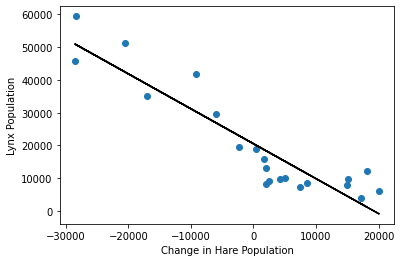

In [8]:
#Get x and y
df['hareGradient'] = np.gradient(df['hare'])
x = df['hareGradient']
y = df['lynx']

#Plot scatter plot
plt.scatter(x,y)
plt.xlabel("Change in Hare Population")
plt.ylabel("Lynx Population")

#Plot line of best fit
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="black")

#Get correlation matrix
df[['hareGradient','lynx']].corr()